In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [5]:
from sklearn.datasets import make_blobs

In [6]:
from sklearn.cluster import AffinityPropagation
aff=AffinityPropagation(random_state=5)
y_aff=aff.fit_predict(X)

In [7]:
clustering = AffinityPropagation(random_state=5).fit(X)

In [8]:
cluster_centers_indices = aff.cluster_centers_indices_
labels = aff.labels_

In [9]:
labels

array([ 2,  1,  0,  1,  2,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  2,
        1,  2,  1,  2,  1,  0,  1,  0,  1,  2,  3,  2,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  2,  1,  2,  1,  2,  3,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  4,  5,  5,  4,  4,  4,  5,  4,  5,  4,
        4,  4,  4,  5,  4,  4,  5,  4,  4,  4,  5,  5,  4,  4,  5,  4,  5,
        4,  4,  5,  4,  7,  5,  8,  5,  7,  6,  8,  6,  8,  5,  8,  6,  7,
        6,  8,  6,  8,  6,  7,  5,  7,  6,  7,  5,  8,  6,  7,  6,  7,  6,
        8,  6,  7,  6,  8,  6,  8,  5,  7,  6,  7,  6,  8,  6,  7, 10,  8,
        6,  8,  6,  7,  6,  7,  6,  8, 10,  9, 10,  9, 10,  9, 10,  9, 10,
        9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9, 10,  9], dtype=int64)

In [10]:
n_clusters_ = len(cluster_centers_indices)

In [11]:
n_clusters_

11

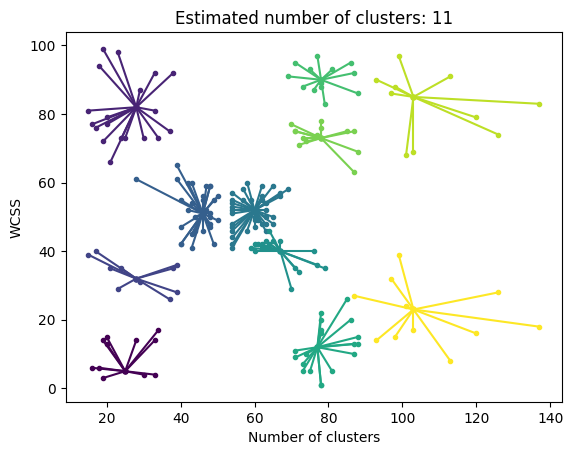

In [12]:
import matplotlib.pyplot as plt

plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 11)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
supervised=dataset

In [14]:
supervised['Cluster_group']=y_aff

In [15]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,9
196,197,Female,45,126,28,10
197,198,Male,32,126,74,9
198,199,Male,32,137,18,10


In [16]:
supervised.to_csv("cluster.csv",index=False)

C:\Users\ANIRUDH\anaconda3\envs\AIML\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


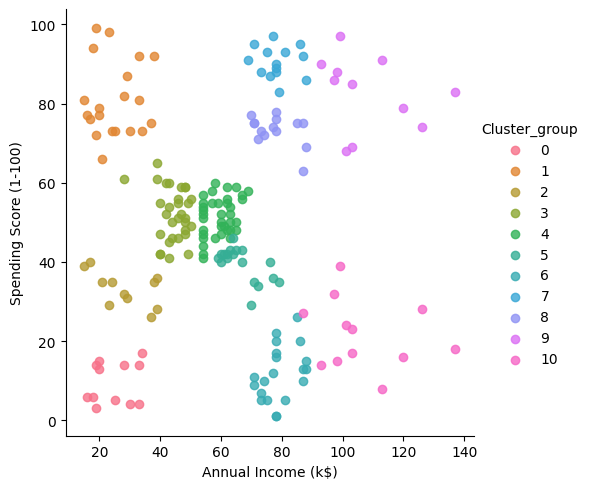

In [17]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)